# Movement markers from SLEAP 

In [4]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
import tools.dsp.preprocessing as preprocessing

importlib.reload(preprocessing)

preprocess = preprocessing.preprocess  # (Re)assign the function if needed
np.random.seed(62)

### Import data

In [5]:
data_dir = "/data/raw/M062/M062_2025_03_21_14_00"
mat_file_0= "M062_2025_03_21_14_00_pyaldata_0.mat"
mat_file_1= "M062_2025_03_21_14_00_pyaldata_1.mat"
mat_file_2= "M062_2025_03_21_14_00_pyaldata_2.mat"

fname0 = os.path.join(data_dir, mat_file_0)
fname1 = os.path.join(data_dir, mat_file_1)
fname2 = os.path.join(data_dir, mat_file_2)

df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df2 = pyal.mat2dataframe(fname2, shift_idx_fields=True)
df = pd.concat([df0, df1, df2], ignore_index=True)
df = df.drop(columns="all_spikes") # the content is incorrect

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted t

### Preprocess

In [6]:
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])
BIN_SIZE = df_['bin_size'][0]
# get 'all_rates' column
areas =[ "MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]
df_ = pyal.merge_signals(df_, areas, "all_rates")

Repairing columns ['MotSen1_X', 'MotSen1_Y']
Extending index to 47999 in trial: free and id: 0, inserting NaN.
Extending index to 99 in trial: intertrial and id: 1, inserting NaN.
Extending index to 599 in trial: trial and id: 2, inserting NaN.
Extending index to 299 in trial: intertrial and id: 3, inserting NaN.
Extending index to 599 in trial: trial and id: 4, inserting NaN.
Extending index to 99 in trial: intertrial and id: 5, inserting NaN.
Extending index to 599 in trial: trial and id: 6, inserting NaN.
Extending index to 299 in trial: intertrial and id: 7, inserting NaN.
Extending index to 599 in trial: trial and id: 8, inserting NaN.
Extending index to 499 in trial: intertrial and id: 9, inserting NaN.
Extending index to 599 in trial: trial and id: 10, inserting NaN.
Extending index to 499 in trial: intertrial and id: 11, inserting NaN.
Extending index to 599 in trial: trial and id: 12, inserting NaN.
Extending index to 299 in trial: intertrial and id: 13, inserting NaN.
Extendi

/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (122, 16000)
Resulting SSp_spikes ephys data shape is (NxT): (66, 16000)
Resulting CP_spikes ephys data shape is (NxT): (280, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (179, 16000)


In [7]:
# correct trial length - this is an error in pyaldata
df_['trial_length'] = (df_['trial_length'] / (BIN_SIZE * 100)).astype(int)
# df_ = df_[df_['trial_length'] == 200]
# df_.reset_index(inplace=True)

# === Metadata ===
session_id = mat_file_0.replace("_pyaldata_0.mat", "")
mouse = session_id.split('_')[0]
perturb_time_idx = df_.idx_sol_on[2]
perturb_time_sec = perturb_time_idx * BIN_SIZE

# sol_angles = sorted(df_.values_Sol_direction.unique())
# trial_labels = [f"solenoid {angle}" for angle in sol_angles]
num_trials = len(df_)

print(f"Mouse: {mouse}")
print(f"Number of trials: {num_trials}")
# print(f"Perturbation time (bins): {perturb_time_idx}, ({perturb_time_sec:.2f} sec)")

Mouse: M062
Number of trials: 708


In [8]:
print(f"Columns in dataframe: {df_.columns}")

Columns in dataframe: Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'values_MotSen1_X',
       'idx_MotSen1_X', 'values_MotSen1_Y', 'idx_MotSen1_Y', 'hip_center',
       'left_ankle', 'left_ankle_angle', 'left_elbow', 'left_elbow_angle',
       'left_foot', 'left_knee', 'left_knee_angle', 'left_paw',
       'left_shoulder', 'left_wrist', 'left_wrist_angle', 'right_ankle',
       'right_ankle_angle', 'right_elbow', 'right_elbow_angle', 'right_foot',
       'right_knee', 'right_knee_angle', 'right_paw', 'right_shoulder',
       'right_wrist', 'right_wrist_angle', 'shoulder_center', 'tail_base',
       'tail_middle', 'tail_tip', 'VAL_chan_best', 'VAL_u

### Look at X and Y movment sensors

### ['values_MotSen1_X', 'idx_MotSen1_X', 'values_MotSen1_Y', 'idx_MotSen1_Y']

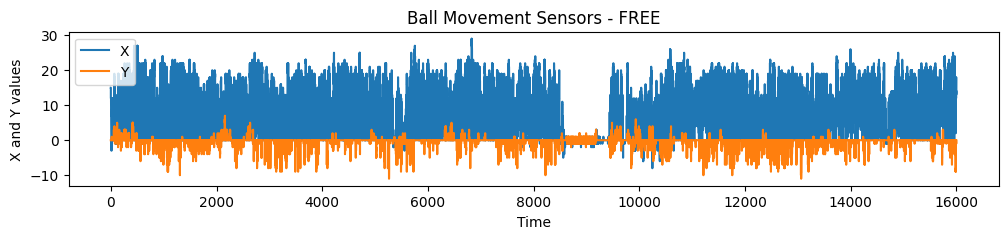

In [9]:
plt.figure(figsize=(12, 2))
plt.plot(df_['idx_MotSen1_X'][0], df_['values_MotSen1_X'][0], label = "X")
plt.plot(df_['idx_MotSen1_Y'][0], df_['values_MotSen1_Y'][0], label = "Y")

plt.xlabel('Time')
plt.ylabel('X and Y values')
plt.legend()
plt.title('Ball Movement Sensors - FREE')
plt.show()

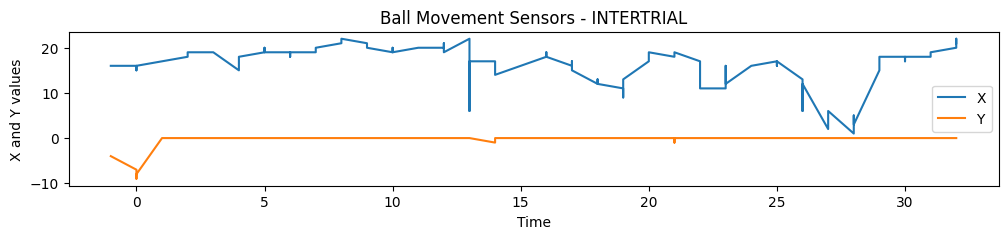

In [10]:
plt.figure(figsize=(12, 2))
plt.plot(df_['idx_MotSen1_X'][1], df_['values_MotSen1_X'][1], label = "X")
plt.plot(df_['idx_MotSen1_Y'][1], df_['values_MotSen1_Y'][1], label = "Y")

plt.xlabel('Time')
plt.ylabel('X and Y values')
plt.legend()
plt.title('Ball Movement Sensors - INTERTRIAL')
plt.show()

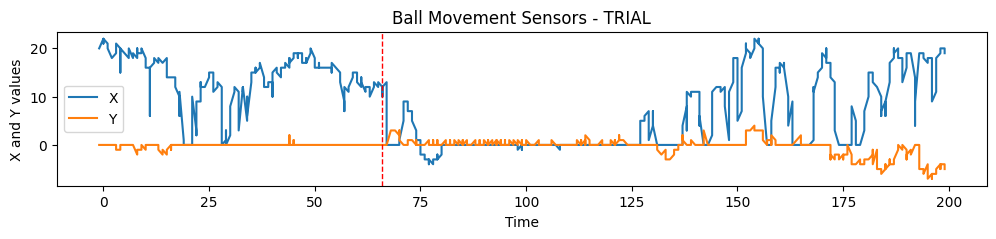

In [11]:
plt.figure(figsize=(12, 2))
plt.plot(df_['idx_MotSen1_X'][2], df_['values_MotSen1_X'][2], label = "X")
plt.plot(df_['idx_MotSen1_Y'][2], df_['values_MotSen1_Y'][2], label = "Y")
plt.axvline(x=perturb_time_idx, color='red', linestyle='--', linewidth=1)

plt.xlabel('Time')
plt.ylabel('X and Y values')
plt.legend()
plt.title('Ball Movement Sensors - TRIAL')
plt.show()

# SLEAP markers

'hip_center','left_ankle', 'left_ankle_angle', 'left_elbow', 'left_elbow_angle',
'left_foot', 'left_knee', 'left_knee_angle', 'left_paw', 'left_shoulder', 'left_wrist', 
'left_wrist_angle', 'right_ankle','right_ankle_angle', 'right_elbow', 'right_elbow_angle', 
'right_foot', 'right_knee', 'right_knee_angle', 'right_paw', 'right_shoulder',
'right_wrist', 'right_wrist_angle', 'shoulder_center', 'tail_base', 'tail_middle', 'tail_tip', 

In [12]:
df_['right_ankle_angle'][0].shape

(16000,)

In [13]:
def plot_stacked_angle_sequences(df_, trial_num, figsize=(12, 5), spacing=70):
    """
    Plot stacked angle sequences for a given trial.

    Parameters:
    - df_ : pandas DataFrame
        Your dataset containing angle columns with sequences.
    - trial_num : int
        The index of the trial to plot.
    - figsize : tuple
        Size of the plot (width, height).
    - spacing : int
        Vertical spacing between stacked lines.
    - perturb_time_idx : int or None
        Optional index to mark a perturbation with a red line.
    """
    angle_columns = [col for col in df_.columns if col.endswith('_angle')]
    trial_type = df_.loc[trial_num, 'trial_name']
    perturb_time_idx = df_.idx_sol_on[2]

    plt.figure(figsize=figsize)

    offset = 0  # vertical offset

    for col in angle_columns:
        angle_seq = df_.loc[trial_num, col]

        if isinstance(angle_seq, (list, np.ndarray)):
            angle_seq = np.array(angle_seq)
            normalized = angle_seq - np.mean(angle_seq)
            plt.plot(normalized + offset, label=col)
            offset += spacing
        else:
            print(f"Skipping {col}: not a sequence")

    # Optional vertical line for perturbation
    if trial_type == 'trial' and perturb_time_idx is not None:
        plt.axvline(x=perturb_time_idx, color='red', linestyle='--', linewidth=1, label = 'perturbation')

    plt.yticks([])
    plt.title(f"Movement markers for angles - {trial_type} number {trial_num}", fontsize = 16)
    plt.xlabel("Time (bins)", fontsize = 15)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)
    plt.tight_layout()
    plt.xlim(8000, 10000)
    plt.show()

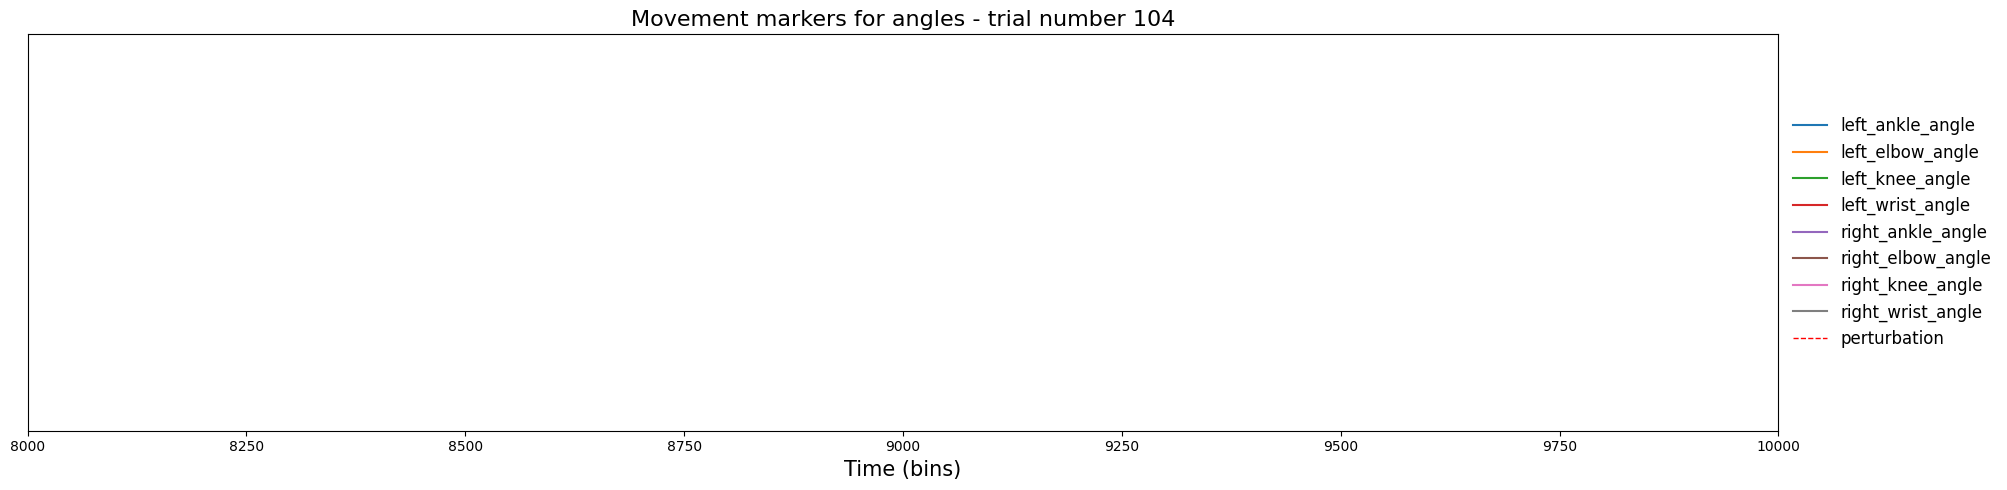

In [14]:
plot_stacked_angle_sequences(df_, trial_num=104, figsize=(20, 5))

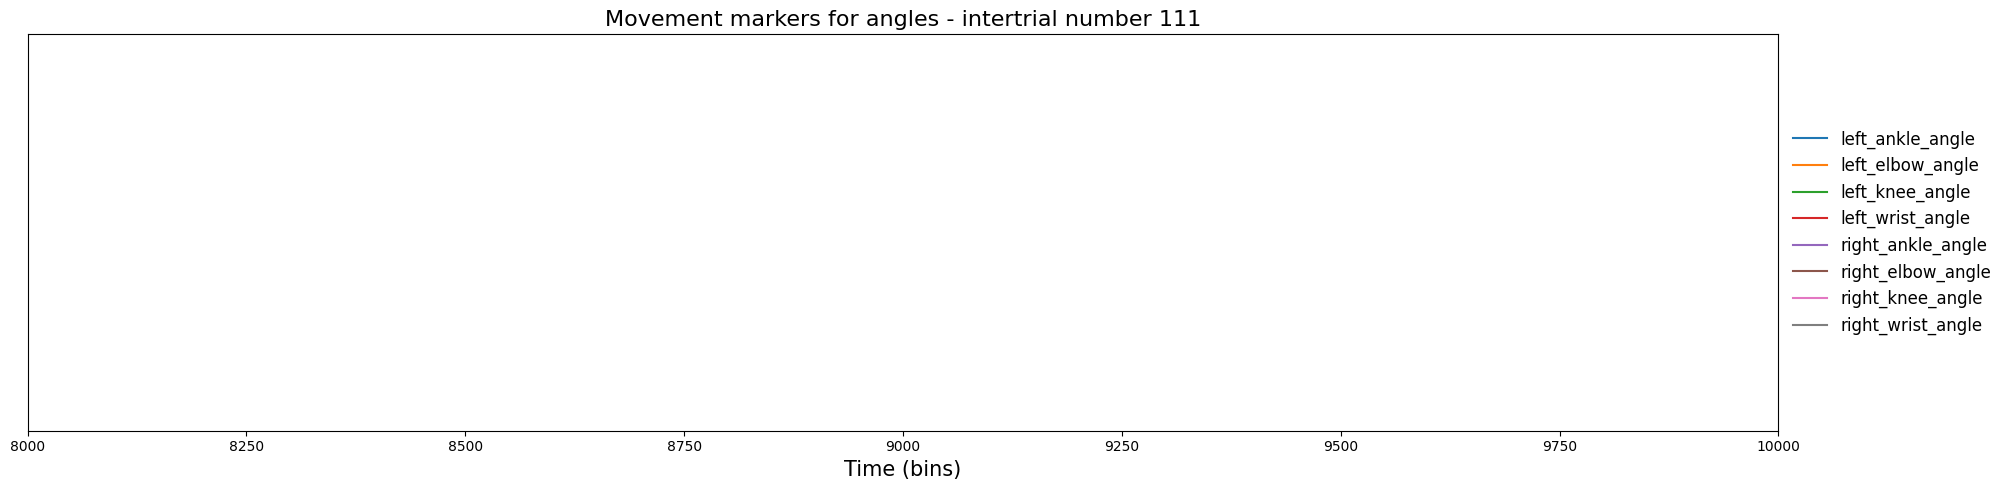

In [15]:
plot_stacked_angle_sequences(df_, trial_num=111
                             , figsize=(20, 5))

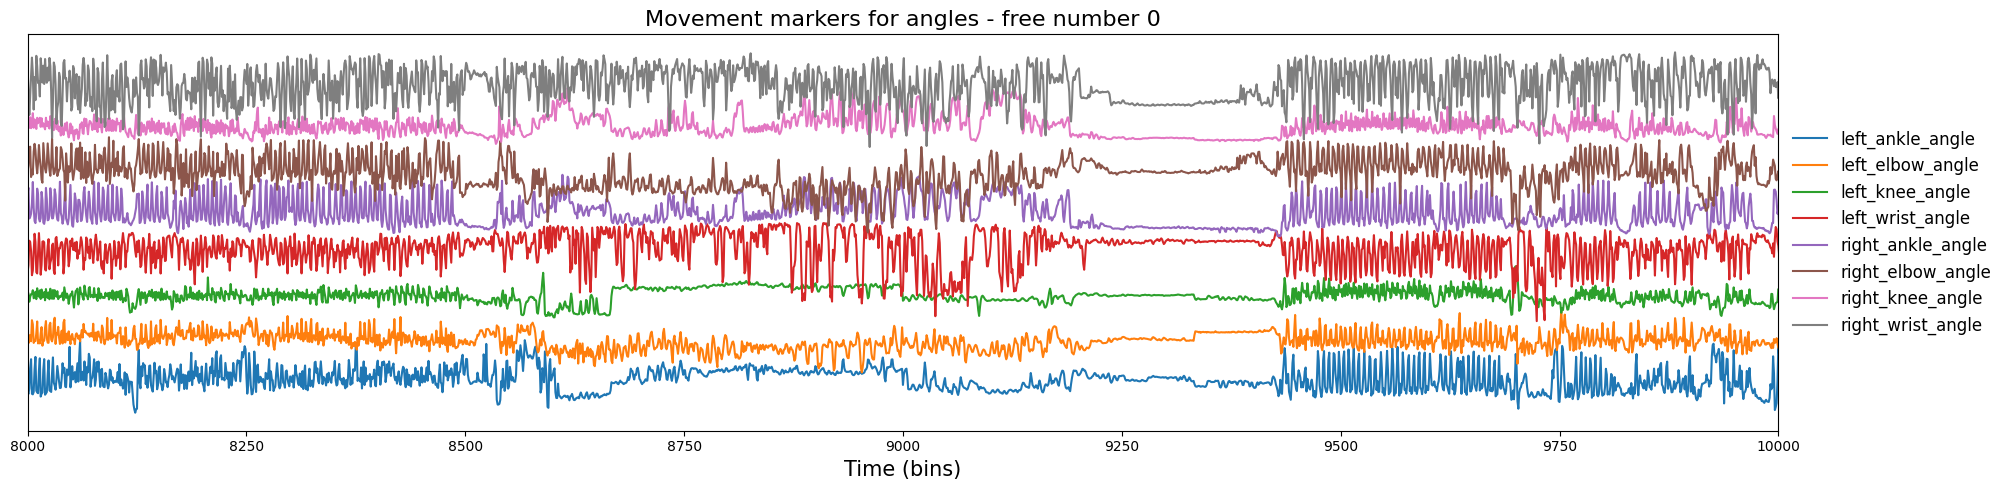

In [16]:
plot_stacked_angle_sequences(df_, trial_num=0, figsize=(20, 5))

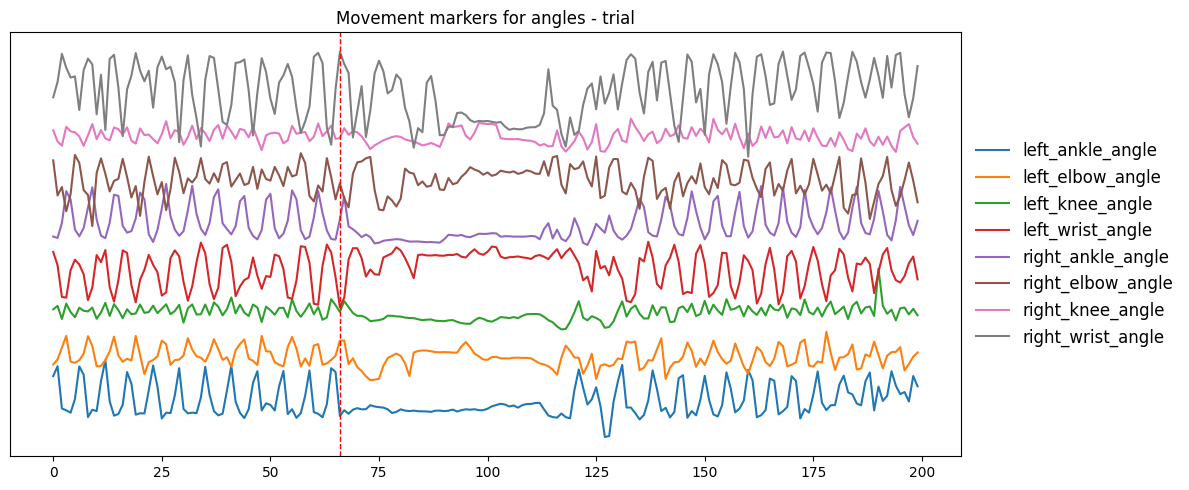

In [17]:
# List of columns you want to plot
columns = [
    'hip_center','left_ankle', 'left_ankle_angle', 'left_elbow', 'left_elbow_angle',
    'left_foot', 'left_knee', 'left_knee_angle', 'left_paw', 'left_shoulder', 'left_wrist', 
    'left_wrist_angle', 'right_ankle','right_ankle_angle', 'right_elbow', 'right_elbow_angle', 
    'right_foot', 'right_knee', 'right_knee_angle', 'right_paw', 'right_shoulder',
    'right_wrist', 'right_wrist_angle', 'shoulder_center', 'tail_base', 'tail_middle', 'tail_tip'
]

# Select columns ending with '_angle'
angle_columns = [col for col in df_.columns if col.endswith('_angle')]

plt.figure(figsize=(12, 5))

offset = 0  # vertical offset
spacing = 60  # space between lines

trial_num = 2
trial_type = df_.loc[trial_num, 'trial_name']

for col in angle_columns:
    angle_seq = df_.loc[trial_num, col]
    
    if isinstance(angle_seq, (list, np.ndarray)):
        angle_seq = np.array(angle_seq)
        normalized = angle_seq - np.mean(angle_seq)  # optional: normalize around 0
        plt.plot(normalized + offset, label=col)
        offset += spacing  # move up for the next line
    else:
        print(f"Skipping {col}: not a sequence")

if trial_type == 'trial':
    plt.axvline(x=perturb_time_idx, color='red', linestyle='--', linewidth=1)
# Remove axis labels and ticks if you want a clean look
plt.yticks([])
# plt.xticks([])
plt.title(f"Movement markers for angles - {trial_type}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon = False)
plt.tight_layout()
# plt.xlim(5000, 6000)
plt.show()

### *right ankle angle* and *left wrist angle* look good to get the gait cycle from

## Determine gait cycle

In [18]:
from scipy.signal import find_peaks

In [41]:
def plot_gait_cycles(angle_data, trial_label=None, distance=4, figsize=(12, 3), color='green'):
    """
    Detects and plots gait cycles in a given 1D angle signal.

    Parameters:
    - angle_data : list or np.ndarray
        1D sequence of angle values (e.g., from df_.loc[trial, 'joint_angle']).
    - trial_label : str or None
        Optional title/label to include in the plot.
    - distance : int
        Minimum distance between peaks (in frames).
    - figsize : tuple
        Size of the matplotlib figure.
    - color : str
        Color of the shaded gait cycles.
    """
    angle_seq = np.array(angle_data)

    # Step 1: Detect peaks
    peaks, _ = find_peaks(angle_seq, distance=distance)

    # Step 2: Define gait cycles (between every 2 peaks)
    gait_cycles = []
    for i in range(0, len(peaks) - 2, 2):
        start = peaks[i]
        end = peaks[i + 2]
        gait_cycles.append((start, end))

    # Step 3: Plot
    plt.figure(figsize=figsize)
    plt.plot(angle_seq, label='Angle')
    plt.plot(peaks, angle_seq[peaks], "ro", label='Peaks')

    for start, end in gait_cycles:
        plt.axvspan(start, end, color=color, alpha=0.2)

    title = "Gait Cycles Detected"
    if trial_label:
        title += f" - {trial_label}"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Angle")
    plt.xlim(5200, 5700)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return gait_cycles

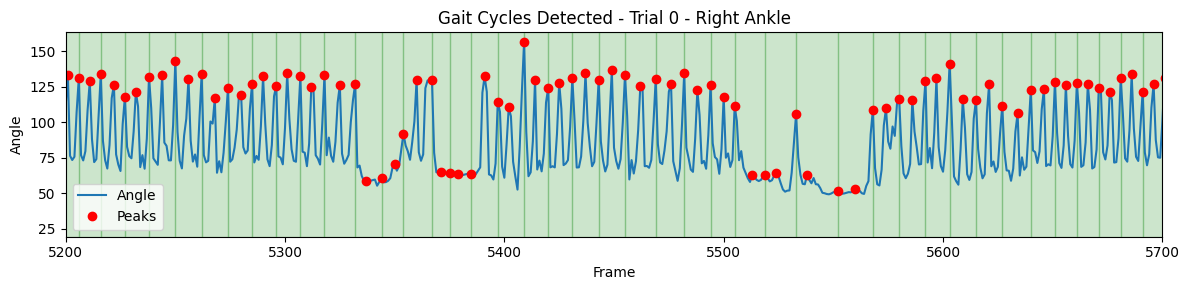

In [42]:
angle_data = df_.loc[0, 'right_ankle_angle']
cycles = plot_gait_cycles(angle_data, trial_label="Trial 0 - Right Ankle")

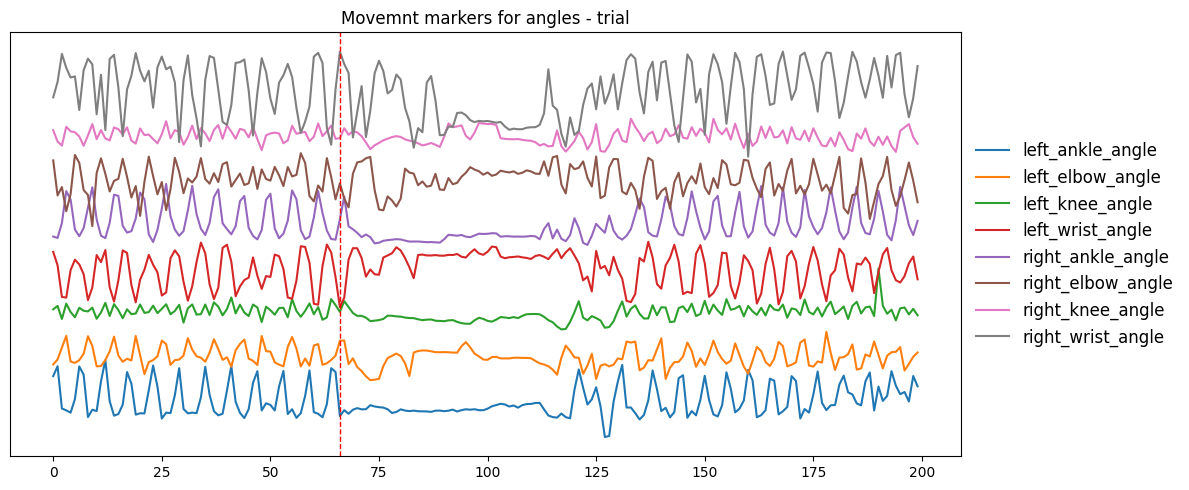

In [22]:
good_columns = ['right_ankle_angle', 'left_wrist_angle']

plt.figure(figsize=(12, 5))

offset = 0  # vertical offset
spacing = 60  # space between lines

trial_num = 2
trial_type = df_.loc[trial_num, 'trial_name']

for col in angle_columns:
    angle_seq = df_.loc[trial_num, col]
    
    if isinstance(angle_seq, (list, np.ndarray)):
        angle_seq = np.array(angle_seq)
        normalized = angle_seq - np.mean(angle_seq)  # optional: normalize around 0
        plt.plot(normalized + offset, label=col)
        offset += spacing  # move up for the next line
    else:
        print(f"Skipping {col}: not a sequence")

if trial_type == 'trial':
    plt.axvline(x=perturb_time_idx, color='red', linestyle='--', linewidth=1)
# Remove axis labels and ticks if you want a clean look
plt.yticks([])
# plt.xticks([])
plt.title(f"Movemnt markers for angles - {trial_type}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon = False)
plt.tight_layout()
# plt.xlim(5000, 6000)
plt.show()